In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from numpy import array

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df[pd.isnull(df).any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [5]:
#null_columns=
df.columns[df.isnull().any()]

Index([], dtype='object')

In [6]:
#for column in null_columns:
 #   df = (df.replace(-1, np.nan).interpolate().astype(int).astype('O').rename_categories(df.cat.categories))

In [7]:
df.interpolate()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [8]:
df[pd.isnull(df).any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
accuracy_arr=[]
cross_validation_scores=[]

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
def encode_col(col_name):
    encodes = le.fit(df[col_name])
    new_col_name = "e."+col_name
    df[new_col_name] = df[col_name].map(lambda x: encodes.transform([x]))
    df[new_col_name] = df[new_col_name].map(lambda x:x[0])
    return

In [12]:
encode_col('Attrition')
encode_col('BusinessTravel')
encode_col('Department')
encode_col('EducationField')
encode_col('Gender')
encode_col('JobRole')
encode_col('MaritalStatus')
encode_col('Over18')
encode_col('OverTime')

In [13]:
X = df[["Age","e.BusinessTravel","DailyRate","e.Department","DistanceFromHome","Education","e.EducationField",'EmployeeCount',"EmployeeNumber","EnvironmentSatisfaction","e.Gender","HourlyRate","JobInvolvement","JobLevel","e.JobRole","JobSatisfaction","e.MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","e.Over18","e.OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

In [14]:
y = df["e.Attrition"]

In [15]:
%store df
%store X

Stored 'df' (DataFrame)
Stored 'X' (DataFrame)


In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'e.Attrition', 'e.BusinessTravel',
       'e.Department', 'e.EducationField', 'e.Gender', 'e.JobRole',
       'e.MaritalStatus', 'e.Over18', 'e.OverTime'],
      dtype='object')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
%store X_train
%store X_test
%store y_train

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)


In [18]:
def add_metrics(accuracy,cross_validation) :
    accuracy_arr.append(accuracy)
    print(accuracy_arr)
    cross_validation_scores.append(cross_validation)
    print(cross_validation_scores)

In [19]:
%run LogisticRegression.ipynb
%store -r accuracy
%store -r cross_validation

Cross_validation= [ 0.85969388  0.84438776  0.85714286]
Mean_square_error= 0.0986394557823
R2_error= 0.142684766214
Confusion_matrix=
 [[251   4]
 [ 25  14]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.91      0.98      0.95       255
          1       0.78      0.36      0.49        39

avg / total       0.89      0.90      0.89       294

0.901360544218
0.853741496599
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [20]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708]
[0.8537414965986394]


In [21]:
%run SelectKBest+LR.ipynb
%store -r accuracy
%store -r cross_validation

Cross_validation= [ 0.8494898   0.84183673  0.84438776]
Mean_square_error= 0.139455782313
R2_error= -0.212066365008
Confusion_matrix=
 [[251   4]
 [ 37   2]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.87      0.98      0.92       255
          1       0.33      0.05      0.09        39

avg / total       0.80      0.86      0.81       294

0.860544217687
0.845238095238
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [22]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479]
[0.8537414965986394, 0.84523809523809523]


In [23]:
%run SelectKBest+kNN.ipynb
%store -r accuracy
%store -r cross_validation

1470
Cross_validation= [ 0.83163265  0.83163265  0.83163265]
Mean_square_error= 0.132653061224
R2_error= -0.152941176471
Confusion_matrix=
 [[255   0]
 [ 39   0]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       255

avg / total       0.87      1.00      0.93       255

0.867346938776
0.831632653061
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [24]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479, 0.86734693877551017]
[0.8537414965986394, 0.84523809523809523, 0.83163265306122447]


In [25]:
%run KNN.ipynb
%store -r accuracy
%store -r cross_validation

1470
Cross_validation= [ 0.83163265  0.83163265  0.83163265]
Mean_square_error= 0.132653061224
R2_error= -0.152941176471
Confusion_matrix=
 [[255   0]
 [ 39   0]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       255

avg / total       0.87      1.00      0.93       255

0.867346938776
0.831632653061
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [26]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479, 0.86734693877551017, 0.86734693877551017]
[0.8537414965986394, 0.84523809523809523, 0.83163265306122447, 0.83163265306122447]


In [27]:
%run RecursiveFeatureElimination.ipynb
%store -r accuracy
%store -r cross_validation

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)
[False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False]
Cross_validation= [ 0.83163265  0.83163265  0.83163265]
Mean_square_error= 0.132653061224
R2_error= -0.152941176471
Confusion_matrix=
 [[255   0]
 [ 39   0]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       255

avg / total       0.87      1.00      0.93       255

0.867346938776
0.831632653061
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [28]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479, 0.86734693877551017, 0.86734693877551017, 0.86734693877551017]
[0.8537414965986394, 0.84523809523809523, 0.83163265306122447, 0.83163265306122447, 0.83163265306122447]


In [29]:
%run RandomForest.ipynb
%store -r accuracy
%store -r cross_validation

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=Fa...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
Cross_validation= [ 0.84183673  0.84693878  0.82142857]
Mean_square_error= 0.132653061224
R2_error= -0.152941176471
Confusion_matrix=
 [[250   5]
 [ 34   5]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       255
          1       0.50      0.13      0.20        39

avg / total       0.83      0.87      0.83       294

0.867346938776
0.836734693878
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [30]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479, 0.86734693877551017, 0.86734693877551017, 0.86734693877551017, 0.86734693877551017]
[0.8537414965986394, 0.84523809523809523, 0.83163265306122447, 0.83163265306122447, 0.83163265306122447, 0.83673469387755117]


In [31]:
%run XGBoost.ipynb
%store -r accuracy
%store -r cross_validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Cross_validation= [ 0.85714286  0.86989796  0.84438776]
Mean_square_error= 0.112244897959
R2_error= 0.0244343891403
Confusion_matrix=
 [[250   5]
 [ 28  11]]
Classification_Report=
              precision    recall  f1-score   support

          0       0.90      0.98      0.94       255
          1       0.69      0.28      0.40        39

avg / total       0.87      0.89      0.87       294

0.887755102041
0.857142857143
Stored 'accuracy' (float64)
Stored 'cross_validation' (float64)


In [32]:
add_metrics(accuracy,cross_validation)

[0.90136054421768708, 0.86054421768707479, 0.86734693877551017, 0.86734693877551017, 0.86734693877551017, 0.86734693877551017, 0.88775510204081631]
[0.8537414965986394, 0.84523809523809523, 0.83163265306122447, 0.83163265306122447, 0.83163265306122447, 0.83673469387755117, 0.8571428571428571]


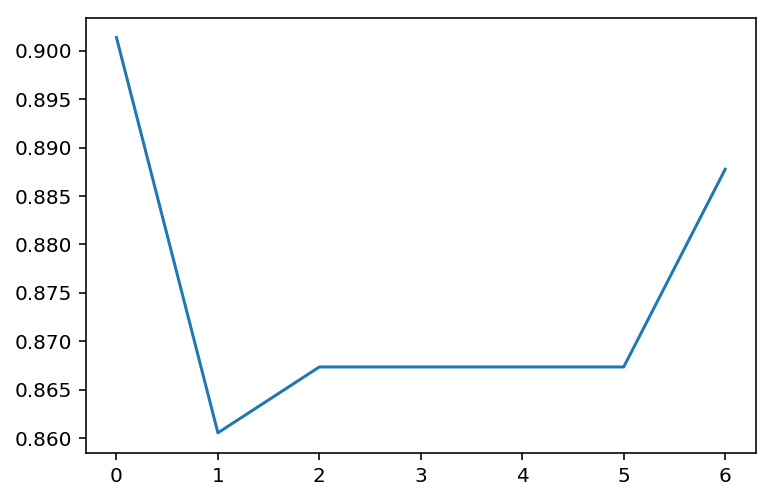

In [35]:
%config InlineBackend.figure_format = 'retina'
plt.plot(accuracy_arr)
plt.show()

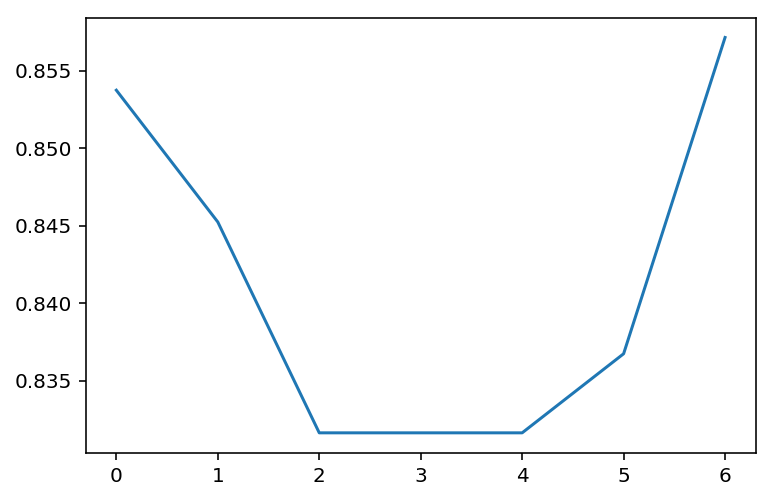

In [36]:
%config InlineBackend.figure_format = 'retina'
plt.plot(cross_validation_scores)
plt.show()

In [38]:
print(max(accuracy_arr))

0.901360544218
